Introduction to Pandas
---

# Introduction to DataFrames

## Create a Dataframe with dates

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

We start by creating series of Gaussian distributed values.

In [2]:
N = 100 ## size of the date
xx = np.random.standard_normal((N, 5))
df = pd.DataFrame(xx)
df.columns = ["Series %s" % i  for i in range(5)]
df.head()

Series 0  Series 1  Series 2  Series 3  Series 4
0  1.332312 -1.280142 -0.509702  0.070114  3.234988
1 -0.479754 -0.138490 -1.357519  0.392771  1.430842
2 -2.316691 -1.609202  0.559674  0.211401 -0.801671
3  0.091458 -0.136313  0.026912  0.473917  0.337250
4  0.446256  0.644307 -1.799725 -0.540514 -0.233580

In [3]:
df.tail()

Series 0  Series 1  Series 2  Series 3  Series 4
95 -0.539210  0.451205 -0.970143 -0.027808  0.993367
96  1.108831 -0.142304  0.164518  0.604769 -1.186683
97 -0.074423 -0.039249  0.557451 -0.102938 -0.645912
98  0.255835  1.267497 -0.437025 -0.016445 -0.352085
99 -0.078182  0.611302 -0.358549 -1.753745  0.605374

Note that the index (first column on the left) has no real meaning here. 
However, in practice, thinking or each other column as time series, it may represent dates. 
We re-index the whole dataframe with this in mind.

In [4]:
dates = pd.date_range('2018-1-1', periods=N, freq="D")
df.index = dates
df.index.name = 'Date'
df.head()

Series 0  Series 1  Series 2  Series 3  Series 4
Date                                                        
2018-01-01  1.332312 -1.280142 -0.509702  0.070114  3.234988
2018-01-02 -0.479754 -0.138490 -1.357519  0.392771  1.430842
2018-01-03 -2.316691 -1.609202  0.559674  0.211401 -0.801671
2018-01-04  0.091458 -0.136313  0.026912  0.473917  0.337250
2018-01-05  0.446256  0.644307 -1.799725 -0.540514 -0.233580

### Basic dataframe manipulations

In [5]:
print('Names of columns:', df.keys())
for key in df.keys():
    print(key)

Names of columns: Index(['Series 0', 'Series 1', 'Series 2', 'Series 3', 'Series 4'], dtype='object')
Series 0
Series 1
Series 2
Series 3
Series 4


A  DataFrame may be indexed like an array, specifying the row and column number using .iloc (index location).
The location can be called either by the index number or by its name.

In [6]:
df.head()

Series 0  Series 1  Series 2  Series 3  Series 4
Date                                                        
2018-01-01  1.332312 -1.280142 -0.509702  0.070114  3.234988
2018-01-02 -0.479754 -0.138490 -1.357519  0.392771  1.430842
2018-01-03 -2.316691 -1.609202  0.559674  0.211401 -0.801671
2018-01-04  0.091458 -0.136313  0.026912  0.473917  0.337250
2018-01-05  0.446256  0.644307 -1.799725 -0.540514 -0.233580

In [7]:
print("First row, second column:")
print(df.iloc[0, 1])
print(df.loc['2018-01-01', 'Series 1'])

print("--------------------------------")
print("Third row")
print(df.iloc[2])
print("--------------- Equivalently:")
print(df.loc['2018-01-03'])
#print df.iloc[:, 0]  # for the first series

First row, second column:
-1.2801421428026554
-1.2801421428026554
--------------------------------
Third row
Series 0   -2.316691
Series 1   -1.609202
Series 2    0.559674
Series 3    0.211401
Series 4   -0.801671
Name: 2018-01-03 00:00:00, dtype: float64
--------------- Equivalently:
Series 0   -2.316691
Series 1   -1.609202
Series 2    0.559674
Series 3    0.211401
Series 4   -0.801671
Name: 2018-01-03 00:00:00, dtype: float64


## Numpy on dataframe

This is where the beauty of the DataFrame comes into the picture, namely that operations need to be performed element by element, 
but apply to a whole series (column) at once.

In [8]:
print('Maximum on the first Series:', df['Series 0'].max())
print('Date where this maximum is attained:', df['Series 0'].argmax()) ## deprecated
print('Date where this maximum is attained:', df['Series 0'].idxmax())
print('Mean of the first series:', df['Series 0'].mean())

Maximum on the first Series: 2.1781564810058107
Date where this maximum is attained: 2018-03-03 00:00:00
Date where this maximum is attained: 2018-03-03 00:00:00
Mean of the first series: -0.07789185622245587


C:\Users\ajacquie\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  from ipykernel import kernelapp as app


We can also get general results about the whole dataframe:

In [9]:
df.mean()

Series 0   -0.077892
Series 1   -0.023863
Series 2   -0.204323
Series 3    0.170321
Series 4   -0.025476
dtype: float64

Print some extracts based on conditions:

In [10]:
mySeries =  df['Series 0'][df['Series 0'] > 2.]
mySeries

Date
2018-02-05    2.077485
2018-03-03    2.178156
Name: Series 0, dtype: float64

We can return the series only:

In [11]:
print(mySeries.values)
print(type(mySeries.values))


[2.07748512 2.17815648]
<class 'numpy.ndarray'>


## Plotting from a dataframe

##### Plot all the time series

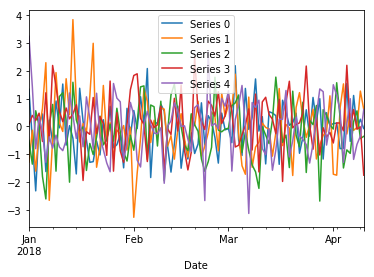

In [12]:
df.plot();

##### Plot one column at a time

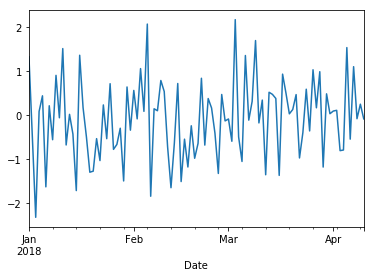

In [13]:
df['Series 0'].plot();

##### Changing the type of plots

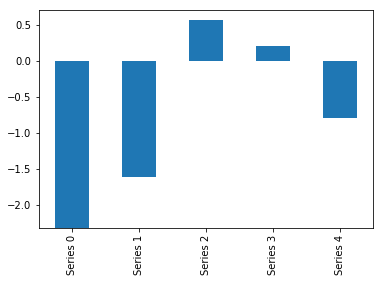

In [14]:
df.loc['2018-01-03'].plot(kind='bar');

## Sorting DataFrames

In [15]:
print('Data sorted by Series 0:')
df.sort_values(by='Series 0').head()

Data sorted by Series 0:


Series 0  Series 1  Series 2  Series 3  Series 4
Date                                                        
2018-01-03 -2.316691 -1.609202  0.559674  0.211401 -0.801671
2018-02-06 -1.837617 -0.581937  0.767188  0.225723  0.062980
2018-01-15 -1.708905  0.856338  0.232719  0.774413 -0.434664
2018-02-12 -1.643466 -0.335986  1.133551 -0.292075  0.200146
2018-01-06 -1.624062  2.287238 -2.606377  1.206296 -1.289697

### Renaming columns

In [16]:
df.rename(columns={'Series 0': 'SPX', 
                   'Series 1': 'DAX', 
                   'Series 2': 'GOOGL', 
                   'Series 3': 'AAPL', 
                   'Series 4': 'VIX'}, inplace=True)
df.head()

SPX       DAX     GOOGL      AAPL       VIX
Date                                                        
2018-01-01  1.332312 -1.280142 -0.509702  0.070114  3.234988
2018-01-02 -0.479754 -0.138490 -1.357519  0.392771  1.430842
2018-01-03 -2.316691 -1.609202  0.559674  0.211401 -0.801671
2018-01-04  0.091458 -0.136313  0.026912  0.473917  0.337250
2018-01-05  0.446256  0.644307 -1.799725 -0.540514 -0.233580

# Importing real data

### Financial data from Yahoo Finance

In [20]:
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import yfinance as yf
import pandas_datareader as web

In [27]:
## Help on the error: https://stackoverflow.com/questions/50394873/import-pandas-datareader-gives-importerror-cannot-import-name-is-list-like?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
import matplotlib.pylab as plt
import os
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader import data, wb
from datetime import datetime
import pandas_datareader as pdr
import pandas_datareader.data as web

ticker = 'WIKI/AAPL'
df = web.DataReader(ticker, 'quandl', '2015-01-01', '2019-01-05')
df.head()

Open    High     Low    Close      Volume  ExDividend  \
Date                                                                  
2018-03-27  173.68  175.15  166.92  168.340  38962839.0         0.0   
2018-03-26  168.07  173.10  166.44  172.770  36272617.0         0.0   
2018-03-23  168.39  169.92  164.94  164.940  40248954.0         0.0   
2018-03-22  170.00  172.68  168.60  168.845  41051076.0         0.0   
2018-03-21  175.04  175.09  171.26  171.270  35247358.0         0.0   

            SplitRatio  AdjOpen  AdjHigh  AdjLow  AdjClose   AdjVolume  
Date                                                                    
2018-03-27         1.0   173.68   175.15  166.92   168.340  38962839.0  
2018-03-26         1.0   168.07   173.10  166.44   172.770  36272617.0  
2018-03-23         1.0   168.39   169.92  164.94   164.940  40248954.0  
2018-03-22         1.0   170.00   172.68  168.60   168.845  41051076.0  
2018-03-21         1.0   175.04   175.09  171.26   171.270  35247358.0

In [28]:
#df.info()
df.keys()

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'ExDividend', 'SplitRatio',
       'AdjOpen', 'AdjHigh', 'AdjLow', 'AdjClose', 'AdjVolume'],
      dtype='object')

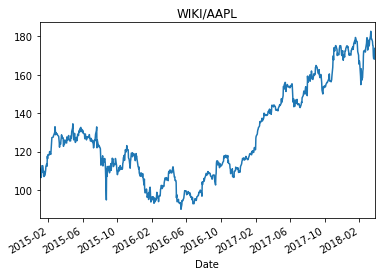

In [29]:
df["Open"].plot(title=ticker)
plt.show()

### Economics Data from FRED

In [30]:
from datetime import date
series_code = 'DGS10' # 10-year Treasury Rate
data_source = 'fred' # FED Economic Data Service
start = date(1962, 1, 1)
data = web.DataReader(series_code, data_source, start)

In [31]:
data.head()

DGS10
DATE             
1962-01-02   4.06
1962-01-03   4.03
1962-01-04   3.99
1962-01-05   4.02
1962-01-08   4.03

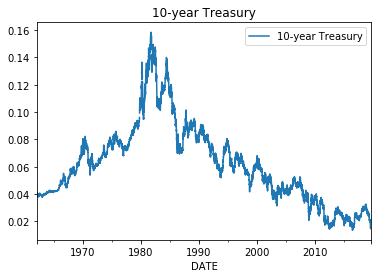

In [32]:
data = data / 100.
series_name = '10-year Treasury'
data = data.rename(columns={series_code: series_name})
data.plot(title=series_name); plt.show() 

# Analysing real data

In [33]:
ticker = 'WIKI/AAPL'
spx = web.DataReader(ticker, 'quandl', '2015-01-01', '2019-01-05')
spx.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 812 entries, 2018-03-27 to 2015-01-02
Data columns (total 12 columns):
Open          812 non-null float64
High          812 non-null float64
Low           812 non-null float64
Close         812 non-null float64
Volume        812 non-null float64
ExDividend    812 non-null float64
SplitRatio    812 non-null float64
AdjOpen       812 non-null float64
AdjHigh       812 non-null float64
AdjLow        812 non-null float64
AdjClose      812 non-null float64
AdjVolume     812 non-null float64
dtypes: float64(12)
memory usage: 82.5 KB


In [34]:
spx.head()

Open    High     Low    Close      Volume  ExDividend  \
Date                                                                  
2018-03-27  173.68  175.15  166.92  168.340  38962839.0         0.0   
2018-03-26  168.07  173.10  166.44  172.770  36272617.0         0.0   
2018-03-23  168.39  169.92  164.94  164.940  40248954.0         0.0   
2018-03-22  170.00  172.68  168.60  168.845  41051076.0         0.0   
2018-03-21  175.04  175.09  171.26  171.270  35247358.0         0.0   

            SplitRatio  AdjOpen  AdjHigh  AdjLow  AdjClose   AdjVolume  
Date                                                                    
2018-03-27         1.0   173.68   175.15  166.92   168.340  38962839.0  
2018-03-26         1.0   168.07   173.10  166.44   172.770  36272617.0  
2018-03-23         1.0   168.39   169.92  164.94   164.940  40248954.0  
2018-03-22         1.0   170.00   172.68  168.60   168.845  41051076.0  
2018-03-21         1.0   175.04   175.09  171.26   171.270  35247358.0

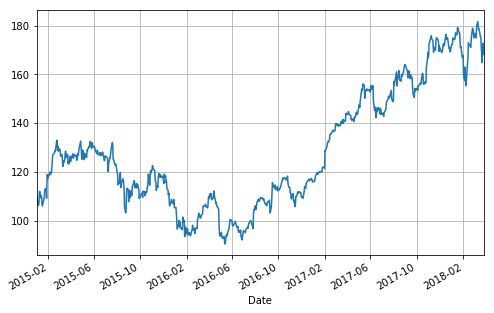

In [35]:
spx['Close'].plot(figsize=(8, 5), grid=True);

#### A quick note on computation time

In [36]:
%%time
spx['ReturnsLoop'] = 0.
for i in range(1, len(spx)):
    spx['ReturnsLoop'][i] = np.log(spx['Close'][i] / spx['Close'][i - 1])

Wall time: 142 ms


In [37]:
spx[['Close', 'ReturnsLoop']].tail()

Close  ReturnsLoop
Date                           
2015-01-08  111.89    -0.001072
2015-01-07  107.75    -0.037703
2015-01-06  106.26    -0.013925
2015-01-05  106.25    -0.000094
2015-01-02  109.33     0.028576

In [38]:
%time spx['Returns'] = np.log(spx['Close'] / spx['Close'].shift(1))
spx[['Close', 'Returns']].head()

Wall time: 3 ms


Close   Returns
Date                         
2018-03-27  168.340       NaN
2018-03-26  172.770  0.025975
2018-03-23  164.940 -0.046379
2018-03-22  168.845  0.023399
2018-03-21  171.270  0.014260

In [39]:
del spx['ReturnsLoop']

In [40]:
spx.dropna().head()

Open    High     Low    Close      Volume  ExDividend  \
Date                                                                  
2018-03-26  168.07  173.10  166.44  172.770  36272617.0         0.0   
2018-03-23  168.39  169.92  164.94  164.940  40248954.0         0.0   
2018-03-22  170.00  172.68  168.60  168.845  41051076.0         0.0   
2018-03-21  175.04  175.09  171.26  171.270  35247358.0         0.0   
2018-03-20  175.24  176.80  174.94  175.240  19314039.0         0.0   

            SplitRatio  AdjOpen  AdjHigh  AdjLow  AdjClose   AdjVolume  \
Date                                                                     
2018-03-26         1.0   168.07   173.10  166.44   172.770  36272617.0   
2018-03-23         1.0   168.39   169.92  164.94   164.940  40248954.0   
2018-03-22         1.0   170.00   172.68  168.60   168.845  41051076.0   
2018-03-21         1.0   175.04   175.09  171.26   171.270  35247358.0   
2018-03-20         1.0   175.24   176.80  174.94   175.240  19314039.0   

             Returns  
Date                  
2018-03-26  0.025975  
2018-03-23 -0.046379  
2018-03-22  0.023399  
2018-03-21  0.014260  
2018-03-20  0.022915

#### Back to the analysis

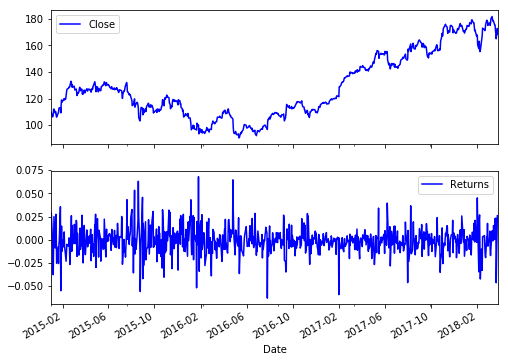

In [41]:
spx[['Close', 'Returns']].plot(subplots=True, style='b',figsize=(8, 6));

\begin{remark}
Some direct observation (stylised facts) from the data:<br>
- Volatility clustering<br>
- Leverage effect
\end{remark}

### Moving averages

In [42]:
n1, n2 = 24, 252
id1, id2 = str(n1)+'d', str(n2)+'d'
spx['id1'] = spx['Close'].rolling(window=n1, center = False).mean()
spx['id2'] = spx['Close'].rolling(window=n2, center = False).mean()
spx.tail()

Open    High      Low   Close      Volume  ExDividend  \
Date                                                                  
2015-01-08  109.23  112.15  108.700  111.89  59364547.0         0.0   
2015-01-07  107.20  108.20  106.695  107.75  40105934.0         0.0   
2015-01-06  106.54  107.43  104.630  106.26  65797116.0         0.0   
2015-01-05  108.29  108.65  105.410  106.25  64285491.0         0.0   
2015-01-02  111.39  111.44  107.350  109.33  53204626.0         0.0   

            SplitRatio     AdjOpen     AdjHigh      AdjLow    AdjClose  \
Date                                                                     
2015-01-08         1.0  103.768957  106.542969  103.265455  106.295968   
2015-01-07         1.0  101.840448  102.790453  101.360696  102.362951   
2015-01-06         1.0  101.213446  102.058949   99.398938  100.947444   
2015-01-05         1.0  102.875953  103.217954  100.139941  100.937944   
2015-01-02         1.0  105.820966  105.868466  101.982949  103.863957   

             AdjVolume   Returns         id1         id2  
Date                                                      
2015-01-08  59364547.0 -0.001072  114.398750  119.941726  
2015-01-07  40105934.0 -0.037703  113.685000  119.986567  
2015-01-06  65797116.0 -0.013925  113.028333  120.008631  
2015-01-05  64285491.0 -0.000094  112.467083  120.022679  
2015-01-02  53204626.0  0.028576  112.067083  120.038472

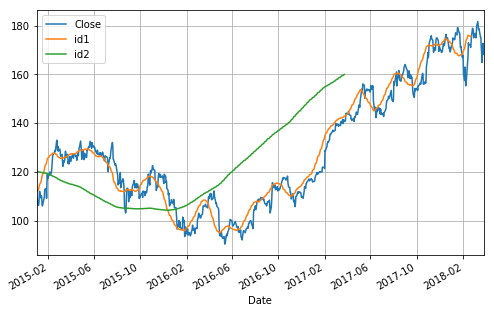

In [43]:
spx[['Close', 'id1', 'id2']].plot(figsize=(8, 5), grid=True);

In [44]:
spx['MovingVol'] = spx['Returns'].rolling(window=252).std() * np.sqrt(252.)

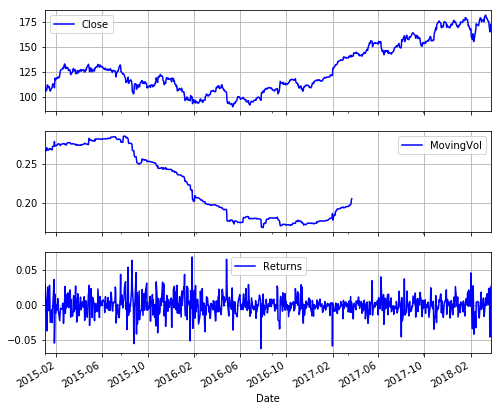

In [45]:
spx[['Close', 'MovingVol', 'Returns']].plot(subplots=True, style='b',figsize=(8, 7), grid=True);

# MTA

In [53]:
import datetime as dt
from urllib.request import urlretrieve
import pandas as pd

In [54]:
url  = r'http://web.mta.info/developers/data/nyct/turnstile/turnstile_180825.txt'
df = pd.read_csv(url)#, index_col=0, header=0, parse_dates=True)

In [68]:
df.head()

C/A  UNIT       SCP STATION LINENAME DIVISION        DATE      TIME  \
0  A002  R051  02-00-00   59 ST  NQR456W      BMT  08/18/2018  00:00:00   
1  A002  R051  02-00-00   59 ST  NQR456W      BMT  08/18/2018  04:00:00   
2  A002  R051  02-00-00   59 ST  NQR456W      BMT  08/18/2018  08:00:00   
3  A002  R051  02-00-00   59 ST  NQR456W      BMT  08/18/2018  12:00:00   
4  A002  R051  02-00-00   59 ST  NQR456W      BMT  08/18/2018  16:00:00   

      DESC  ENTRIES  \
0  REGULAR  6728354   
1  REGULAR  6728373   
2  REGULAR  6728388   
3  REGULAR  6728469   
4  REGULAR  6728665   

   EXITS                                                                 
0                                            2280604                     
1                                            2280609                     
2                                            2280634                     
3                                            2280669                     
4                                            2280681

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197380 entries, 0 to 197379
Data columns (total 11 columns):
C/A                                                                     197380 non-null object
UNIT                                                                    197380 non-null object
SCP                                                                     197380 non-null object
STATION                                                                 197380 non-null object
LINENAME                                                                197380 non-null object
DIVISION                                                                197380 non-null object
DATE                                                                    197380 non-null object
TIME                                                                    197380 non-null object
DESC                                                                    197380 non-null object
ENTRIES                           

In [70]:
url  = r'http://web.mta.info/developers/resources/nyct/turnstile/Remote-Booth-Station.xls'
infoStations = pd.read_excel(url)#, index_col=0, header=0, parse_dates=True)
infoStations.head()

Remote  Booth       Station Line Name Division
0   R001   A060  WHITEHALL ST        R1      BMT
1   R001   A058  WHITEHALL ST        R1      BMT
2   R001  R101S   SOUTH FERRY        R1      IRT
3   R002   A077     FULTON ST  ACJZ2345      BMT
4   R002   A081     FULTON ST  ACJZ2345      BMT

### Looking at the data

In [71]:
df['ENTRIES'].max()

2129780411

In [76]:
#df.keys()
df['EXITS'].max()

KeyError: 'EXITS'

In [62]:
df.keys()

Index([u'C/A', u'UNIT', u'SCP', u'STATION', u'LINENAME', u'DIVISION', u'DATE',
       u'TIME', u'DESC', u'ENTRIES',
       u'EXITS                                                               '],
      dtype='object')

In [77]:
df.columns = ['ca', 'unit', 'scp', 'station', 'linename', 'division', 'date','time', 'desc', 'entries','exits']

In [79]:
df['exits'].max()

2062568997

## Question 1: What is the total number of entries and exits across the subway system for August 20, 2018?

In [85]:
import datetime
day = datetime.datetime(year=2018, month=8, day=20, hour=0, minute=0, second=0)
day2 = day + datetime.timedelta(days=1)

d = (df.groupby(['ca', 'unit', 'scp'])['entries', 'exits'].max() - df.groupby(['ca', 'unit', 'scp'])['entries', 'exits'].min())
print("Total number of entries on %s-%s-%s: " %(day.year, day.month, day.day), int(d['entries'].sum()))
print("Total number of exits on %s-%s-%s: " %(day.year, day.month, day.day), int(d['exits'].sum()))

Total number of entries on 2018-8-20:  1866307136
Total number of exits on 2018-8-20:  2000032129


## If we define the "busy-ness" as the sum of entries and exits, what station was the busiest on August 20, 2018?  What turnstile was the busiest on that date?

In [87]:
d = (df.groupby(['ca', 'unit', 'scp', 'station'])['entries', 'exits'].max() - df.groupby(['ca', 'unit', 'scp', 'station'])['entries', 'exits'].min())
d['total'] = d['entries'] + d['exits']
totalByStations = ((d.groupby(['station']))['total'].sum())
print("The busiest station on %s-%s-%s was %s with %d entries and exits." %(day.year, day.month, day.day, totalByStations.idxmax(), int(totalByStations.max())))
dt = (d.groupby(['ca', 'unit', 'scp', 'station']))
print("The busiest turnstile on %s-%s-%s was %s with %d entries and exits." %(day.year, day.month, day.day, (dt['total'].sum()).idxmax(), int((dt['total'].sum()).max())))

The busiest station on 2018-8-20 was 182-183 STS with 3270142261 entries and exits.
The busiest turnstile on 2018-8-20 was ('N215', 'R237', '00-00-02', '182-183 STS') with 3270117897 entries and exits.


In [88]:
import pandas as pd
print(pd.__version__)

0.24.2
